Đề 2: Arima và Sarima, HMM

In [4]:
msv = 2151260833
col1 = msv%3 + 1
print(col1)

2


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the dataset
data = pd.read_csv('.\data-kiem-tra-1.csv')

# Display the first few rows of the dataset
data.head()

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,02.01.2013,0,59,22154,999.00,1
1,03.01.2013,0,25,2552,899.00,1
2,05.01.2013,0,25,2552,899.00,-1
3,06.01.2013,0,25,2554,1709.05,1
4,15.01.2013,0,25,2555,1099.00,1


ARIMA

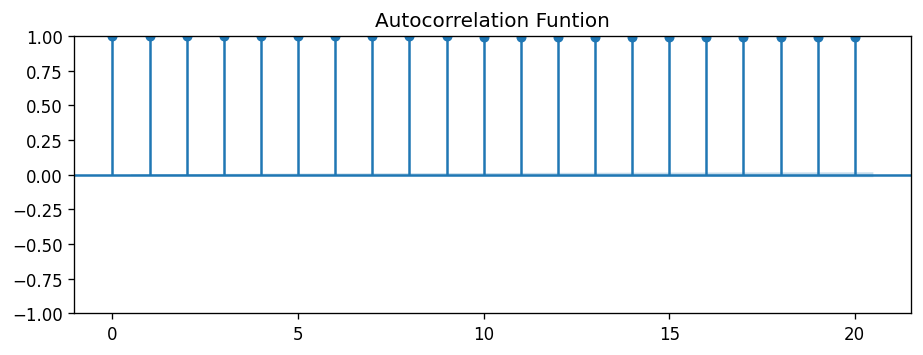

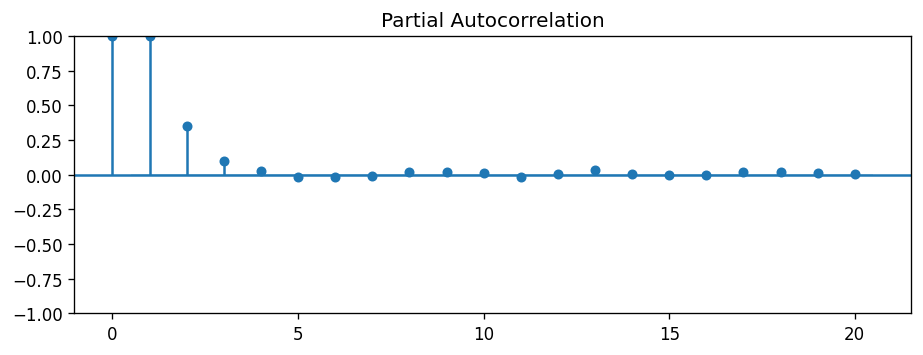

In [18]:
plot_acf(data['truong_2'],lags =20)
plt.title('Autocorrelation Funtion')
plt.show()

plot_pacf(data['truong_2'],lags =20)
plt.title('Partial Autocorrelation')
plt.show()

In [20]:
df = data['truong_2']

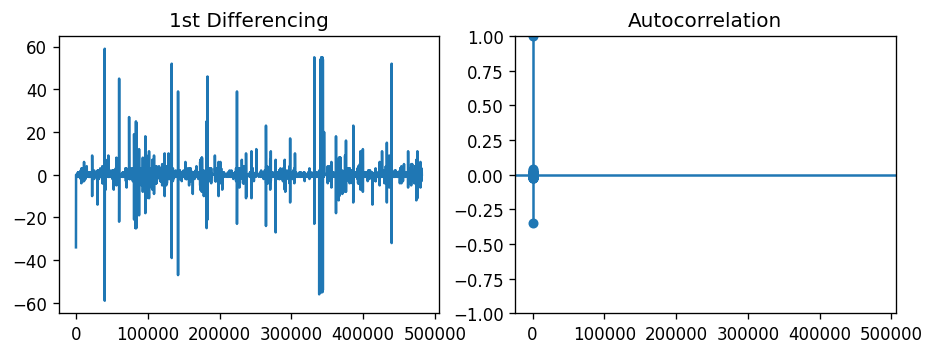

In [22]:
# tính d
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.diff().dropna(), ax=axes[1])

plt.show()


In [23]:
result = adfuller(df.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.425536
p-value: 0.000000


In [25]:
model = ARIMA(df,order =(1,1,2))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               truong_2   No. Observations:               481822
Model:                 ARIMA(1, 1, 2)   Log Likelihood             -373051.015
Date:                Tue, 04 Jun 2024   AIC                         746110.030
Time:                        07:59:22   BIC                         746154.371
Sample:                             0   HQIC                        746122.602
                             - 481822                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3543      0.001    244.072      0.000       0.351       0.357
ma.L1         -0.7432      0.001   -513.408      0.000      -0.746      -0.740
ma.L2          0.1808      0.001    334.021      0.0

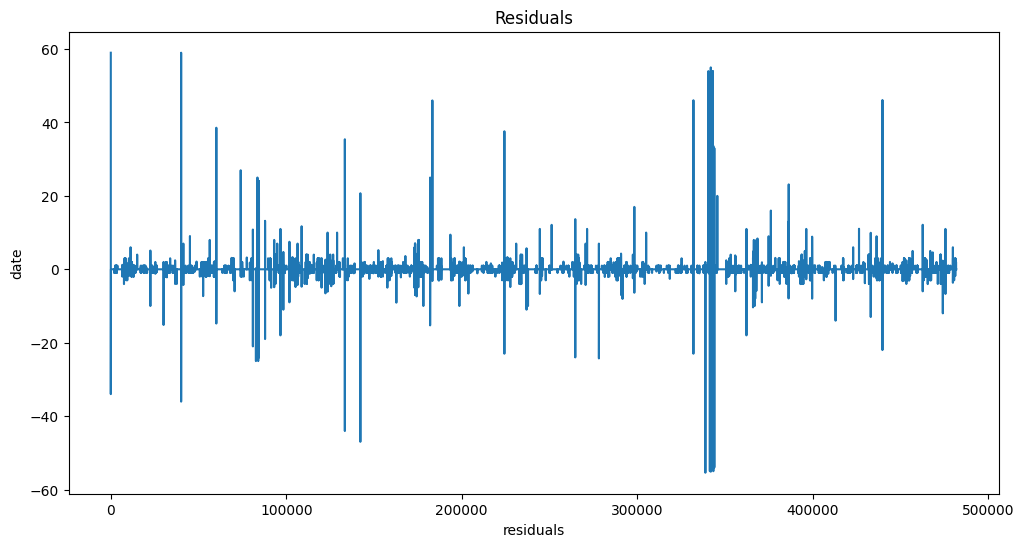

In [2]:
model = ARIMA(data['truong_2'],order =(1,1,2))
model = model.fit()

plt.figure(figsize = (12,6))
residuals = model.resid
plt.plot(residuals)
plt.xlabel('residuals')
plt.ylabel('date')
plt.title('Residuals')
plt.show()

In [5]:
# tính lại độ do sau khi train qua mô hình ARIMA
print('ADF Statistic : %f' %adfuller(residuals)[0])
print('p-values: %f'%adfuller(residuals)[1])

ADF Statistic : -73.493683
p-values: 0.000000


SARIMA

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Khởi tạo mô hình với 
sarima = SARIMAX(data['truong_2'],
                 order=(1,1,2),
                 seasonal_order=(1,1,2,365),
                 )

# Huấn luyện mô hình
results = sarima.fit()

# Dự đoán
predictions = results.predict()

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(data, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Residuals',fontsize=20)
plt.ylabel('truong_2', fontsize=16)
plt.legend()

GaussianHMM

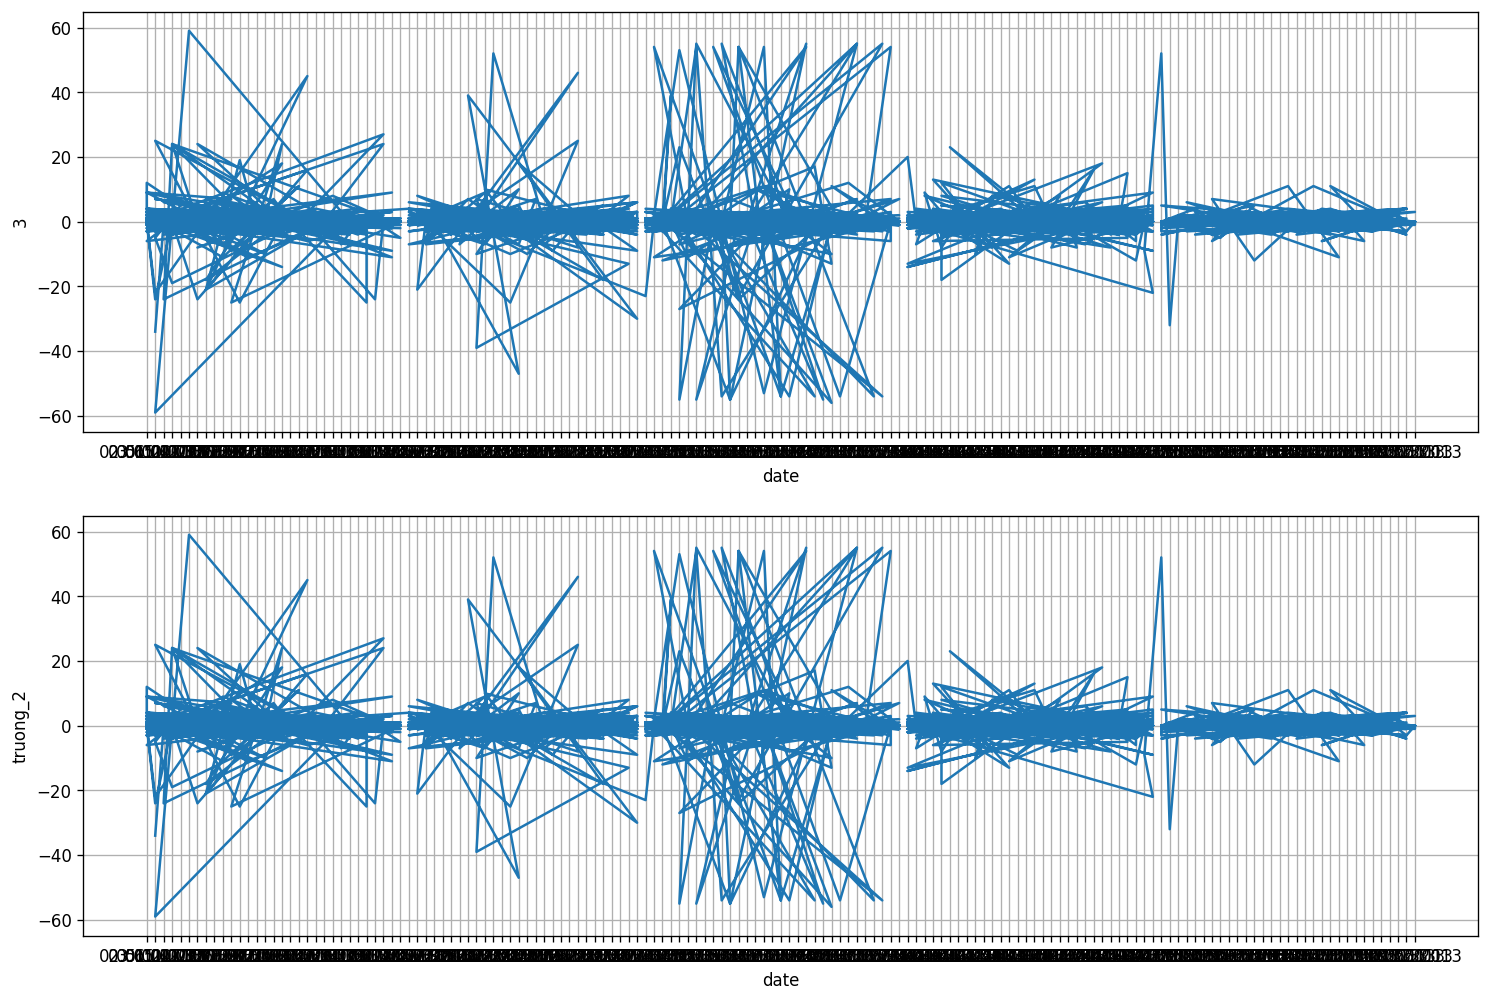

In [27]:
from hmmlearn import hmm

data["truong_2"] = data["truong_2"].diff()

plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(data["date"], data["truong_2"])
plt.xlabel("date")
plt.ylabel("3")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["date"], data["truong_2"])
plt.xlabel("date")
plt.ylabel("truong_2")
plt.grid(True)
plt.show()

In [28]:
from sklearn.impute import SimpleImputer
X = data[["truong_2"]].values
imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
Z = model.predict(X)
states = pd.unique(Z)

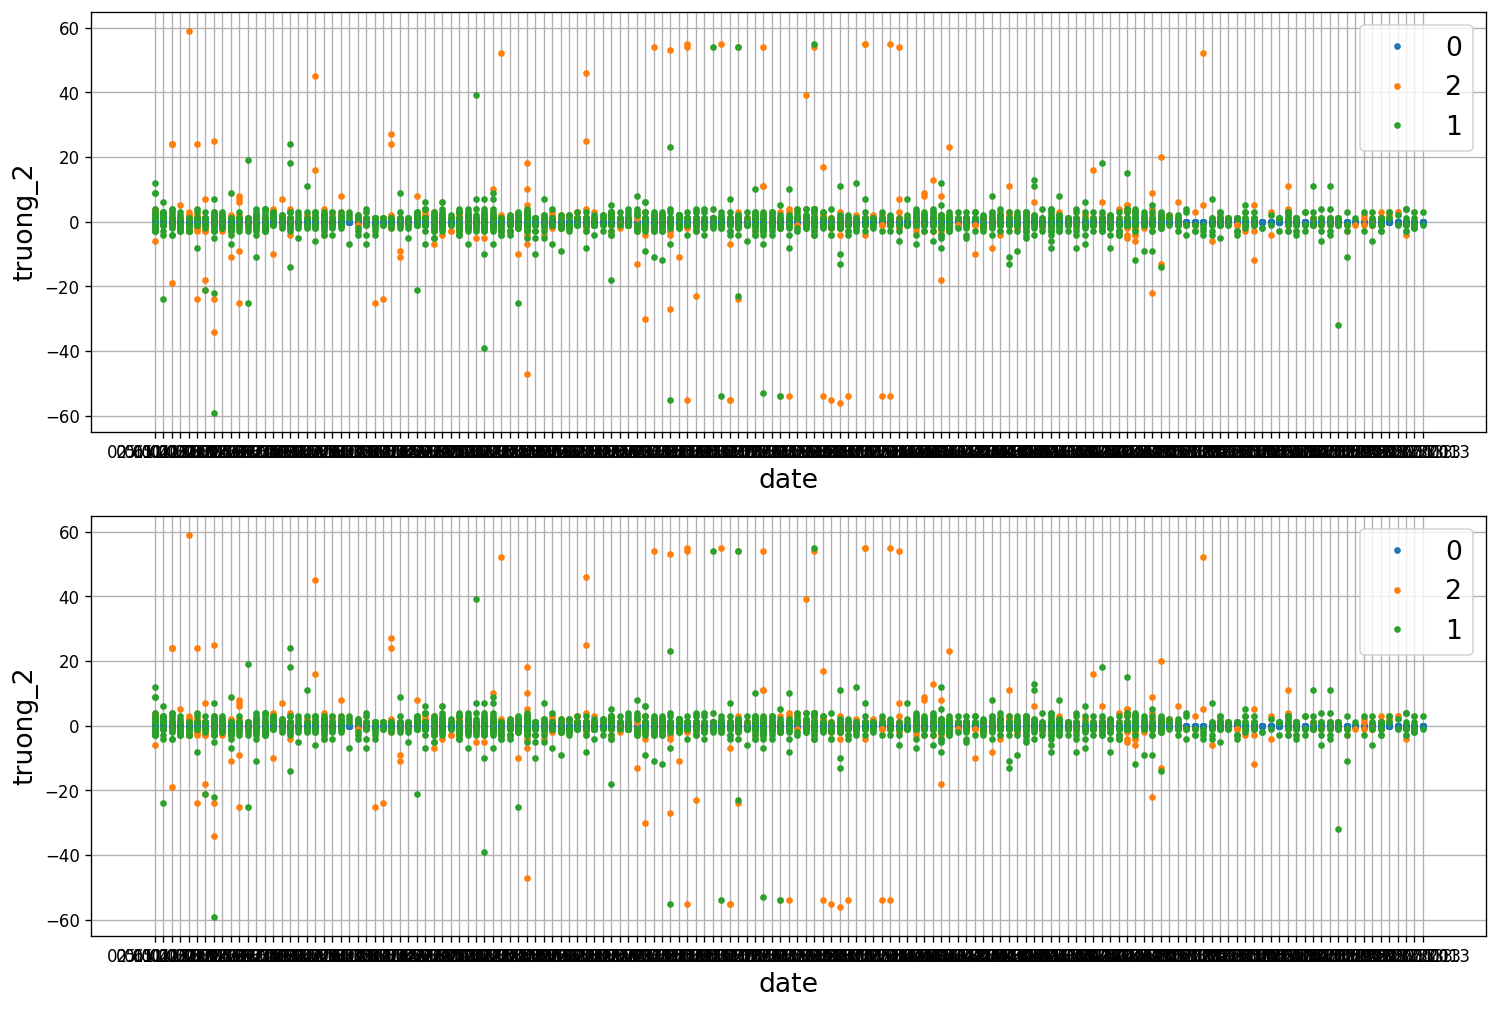

In [29]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = data["date"].iloc[want]
    y = data["truong_2"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("date", fontsize=16)
plt.ylabel("truong_2", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = data["date"].iloc[want]
    y = data["truong_2"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("date", fontsize=16)
plt.ylabel("truong_2", fontsize=16)
plt.show()